# Evaluating Advertisement Effectiveness via A/B Testing  
**Author:** Chia-Yu (Jenny) Wei     
**Date:** Jun 2023

## Introduction

## Project Overview
This project evaluates the effectiveness of three marketing campaigns (Promotion 1, 2, 3) using A/B testing methodology. We analyze sales performance across different stores and markets, apply statistical testing (ANOVA, Tukey HSD), and explore heterogeneity effects by market size and store age. The goal is to provide actionable business insights on which promotions are most effective and how strategies should be adapted across different contexts.

### Research Question

* Which promotion generates the highest sales?
* Do promotion effects differ by market size or store age (new vs old)?

### Data
* MarketID: unique market identifier
* MarketSize: market size category (Small, Medium, Large)
* LocationID: unique store identifier
* AgeOfStore: store age (years)
* Promotion: marketing campaign group (1, 2, 3)
* week: week of the campaign (1–4)
* SalesInThousands: sales amount (in $1,000s)

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [132]:
# Data Loading & Understanding
df = pd.read_csv("Marketing-Campaign.csv")
print(f"The shape od the dataset is {df.shape}")
print("Data Information:\n")
print(df.info())
df.head()

The shape od the dataset is (548, 7)
Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB
None


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [138]:
print(df.describe(include="all"))
print("Promotions:", df["Promotion"].unique())
print("Size of Market:", df["MarketSize"].unique())

          MarketID MarketSize  LocationID  AgeOfStore   Promotion        week  \
count   548.000000        548  548.000000  548.000000  548.000000  548.000000   
unique         NaN          3         NaN         NaN         NaN         NaN   
top            NaN     Medium         NaN         NaN         NaN         NaN   
freq           NaN        320         NaN         NaN         NaN         NaN   
mean      5.715328        NaN  479.656934    8.503650    2.029197    2.500000   
std       2.877001        NaN  287.973679    6.638345    0.810729    1.119055   
min       1.000000        NaN    1.000000    1.000000    1.000000    1.000000   
25%       3.000000        NaN  216.000000    4.000000    1.000000    1.750000   
50%       6.000000        NaN  504.000000    7.000000    2.000000    2.500000   
75%       8.000000        NaN  708.000000   12.000000    3.000000    3.250000   
max      10.000000        NaN  920.000000   28.000000    3.000000    4.000000   

        SalesInThousands  


In [134]:
# Check missing values
print(df.isnull().sum())

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


## Exploratory Data Analysis

### Distribution of Sales
The histogram shows that sales are distributed between 20,000 and 100,000 units, with most stores clustered around 40,000–60,000. The distribution is slightly right-skewed, with a few high-performing stores reaching close to 100,000. This indicates moderate variability in store performance, with a concentration in the mid-range. 

### Sales Distribution by Promotion
The boxplot highlights that `Promotion 1` and `3` perform similarly on average, while `Promotion 2` consistently underperforms. 

### Sales Trend by Week for Different Promotions
The line plot illustrates how sales evolved over the four campaign weeks. `Promotion 1` maintains the highest sales throughout and even shows a small upward trend in Week 3. `Promotion 3` remains relatively stable but below Promotion 1, while `Promotion 2` consistently lags behind and shows a slight decline by Week 4.

### Sales vs Store Age
The scatter plot shows no strong linear relationship between store age and sales. Sales remain widely distributed across both young and old stores, although there may be slight clustering of higher sales among younger stores. Overall, this suggests that store age is not a major determinant of sales performance, and promotions likely have similar effects regardless of how old a store is.

C:\Users\chiay\AppData\Local\Temp\ipykernel_25280\3105068911.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_plot, labels=sorted(df["Promotion"].unique()))


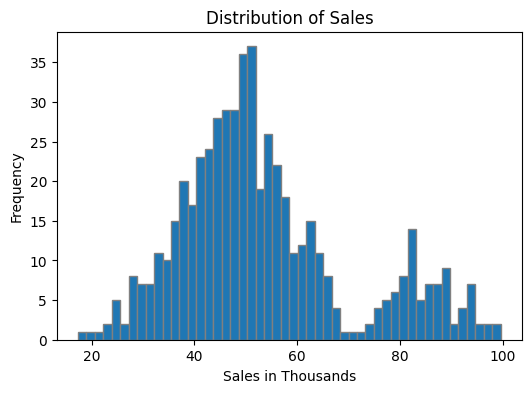

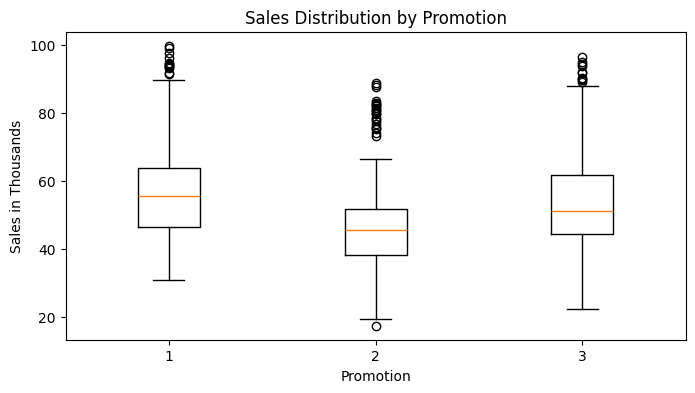

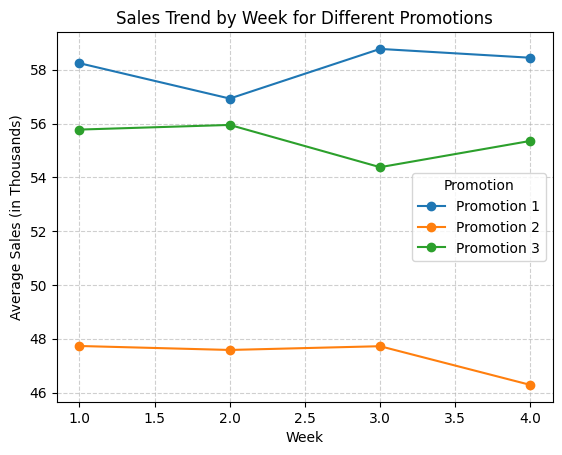

In [139]:

# Histogram of Sales
plt.figure(figsize=(6, 4))
plt.hist(df["SalesInThousands"], bins = 50, edgecolor = "gray")
plt.title("Distribution of Sales")
plt.xlabel("Sales in Thousands")
plt.ylabel("Frequency")
plt.show

# Boxplot od Sales by Promotion
plt.figure(figsize=(8, 4))
data_for_plot = [df[df["Promotion"] == i]["SalesInThousands"] for i in sorted(df["Promotion"].unique())]
plt.boxplot(data_for_plot, labels=sorted(df["Promotion"].unique()))
plt.title("Sales Distribution by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Sales in Thousands")
plt.show()

# by Market Size

# Line plot of weekly Sale Trend by Promotion
weekly_sales = df.groupby(["week", "Promotion"])["SalesInThousands"].mean().unstack()
for promo in weekly_sales.columns:
    plt.plot(weekly_sales.index, weekly_sales[promo], marker="o", label = f"Promotion {promo}")
plt.title("Sales Trend by Week for Different Promotions")
plt.xlabel("Week")
plt.ylabel("Average Sales (in Thousands)")
plt.legend(title="Promotion")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

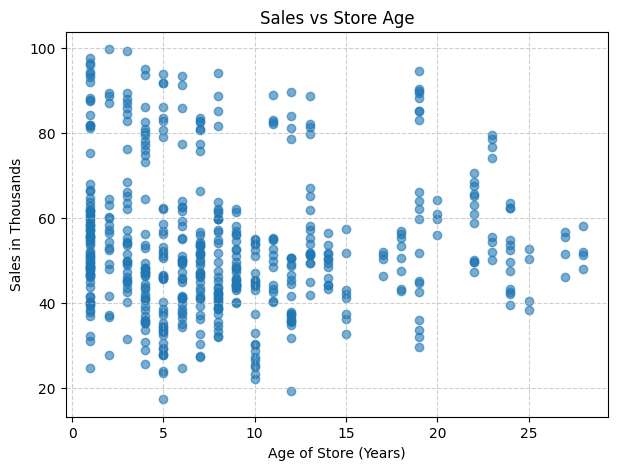

In [136]:
# Scatter plot: Store Age vs Sales
plt.figure(figsize=(7,5))
plt.scatter(df["AgeOfStore"], df["SalesInThousands"], alpha=0.6)
plt.title("Sales vs Store Age")
plt.xlabel("Age of Store (Years)")
plt.ylabel("Sales in Thousands")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Sales Performance by Promotion
In this section, we summarize the average sales, variability, and sample size for each promotion group.
To facilitate comparison, `Promotion 1` is treated as the baseline.
The metric “lift vs Promo 1” represents the difference in average sales compared to `Promotion 1`.   
   
Promotion 1 (baseline):    
- Average sales = 58.1k   
- This serves as the reference point (lift = 0).

Promotion 2:
- Average sales = 47.3k   
- About 10.8k lower than Promotion 1.
- This indicates Promotion 2 performed substantially worse, with sales dropping by almost 10% compared to Promotion 1.

Promotion 3:
- Average sales = 55.4k
- About 2.7k lower than Promotion 1.
- This means Promotion 3 performed slightly worse than Promotion 1, with roughly a 2.7% decrease.

In [137]:
# Descriptive Stat
group_stats = df.groupby("Promotion")["SalesInThousands"].agg(["mean","std","count"])
group_stats["lift_vs_Promo1"] = group_stats["mean"] - group_stats.loc[1,"mean"]
print(group_stats)

                mean        std  count  lift_vs_Promo1
Promotion                                             
1          58.099012  16.553782    172        0.000000
2          47.329415  15.108955    188      -10.769597
3          55.364468  16.766231    188       -2.734544


## Statistical Testing  
In this section, we formally test whether the observed differences in average sales across the three promotion groups are statistically significant.
We first run a one-way ANOVA to test the null hypothesis that all groups have the same mean sales.
If the ANOVA is significant, we conduct a post-hoc Tukey HSD test to identify which pairs of promotions differ significantly.   

- ANOVA test across the 3 promotions
- Post-hoc test (Tukey HSD) or pairwise t-tests


### ANOVA 
$H_0$: All promotion have equal mean sales      
$H_a$: At least one of the promotion has different mean sales 

**Conclusion:** At least one of the promotion's mean sales is significantly different than others.

In [ ]:
# ANOVA
model = ols("SalesInThousands ~ C(Promotion)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_table)

  
### Post-hoc test   
The result confirms that `Promotion 2` underperforms relative to the other campaigns. `Promotions 1` and `3` generate comparable results, and either can be chosen depending on business priorities such as cost, ease of implementation, or strategic alignment.

In [140]:
# Tukey HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=df["SalesInThousands"],
                          groups=df["Promotion"],
                          alpha=0.05)
print("\nTukey HSD Results:")
print(tukey)


Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


## Regression Modeling  

I built the model:
$$
Sale = \beta_0 + \beta_1*I(Prmotion = 2) + \beta_2*(Promotion = 3) + \beta_3*I(MarketSize = Medium) + \beta_4*(MarketSize = Small) + \beta_5*AgeOfStore
$$

Results show that `Promotion 2` significantly reduces sales by about 10.8 thousand units compared to `Promotion 1` (p < 0.001), while `Promotion 3` is not statistically different from `Promotion 1`.   
   
Market size also plays a major role: sales in medium markets are about 26.6 thousand lower and in small markets about 14.1 thousand lower than in large markets, both highly significant (p < 0.001). In contrast, store age does not have a significant impact on sales.

Overall, Promotion 1 and Promotion 3 are the most effective strategies, while Promotion 2 should be avoided. Large markets clearly generate the highest sales, suggesting that marketing resources should be prioritized there.



In [128]:
df["MarketSize"] = df["MarketSize"].astype("category")
model2 = ols("SalesInThousands ~ C(Promotion) + C(MarketSize) + AgeOfStore", data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     150.9
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          3.35e-100
Time:                        18:01:49   Log-Likelihood:                -2082.7
No. Observations:                 548   AIC:                             4177.
Df Residuals:                     542   BIC:                             4203.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Heterogeneity Analysis

While overall comparisons across promotions provide useful insights, they may hide important differences across subgroups. Heterogeneity analysis explores whether the effectiveness of each promotion varies depending on ``store or `market` characteristics. Specifically, we examine how sales differ by market size (small, medium, large) and whether store age moderates the impact of promotions. By incorporating interaction effects into regression models, we can identify which promotions work best for specific types of stores and markets. 
   
### Market Size

Based on the result, the results confirm that market size is a major determinant of sales performance, and that `Promotion 2` consistently underperforms across all markets. `Promotion 1` and `3` are most effective in large markets, while smaller markets generate lower returns regardless of promotion.

C:\Users\chiay\AppData\Local\Temp\ipykernel_25280\16892892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["Promotion", "MarketSize"])["SalesInThousands"].mean().unstack()


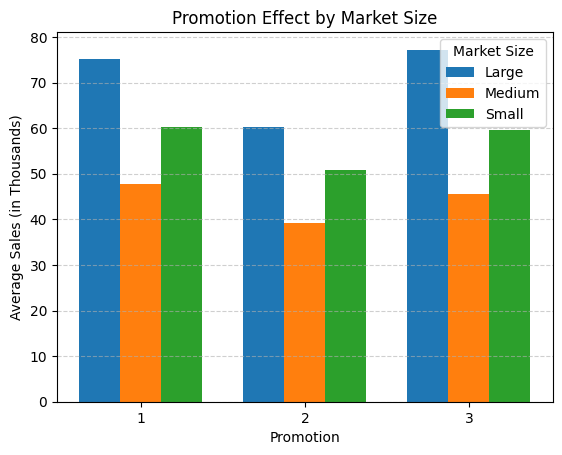

In [129]:
grouped = df.groupby(["Promotion", "MarketSize"])["SalesInThousands"].mean().unstack()

promotions = grouped.index.astype(str)
market_sizes = grouped.columns
x = np.arange(len(promotions))
bar_width = 0.25

for i, m in enumerate(market_sizes):
    plt.bar(x + i*bar_width, grouped[m], width=bar_width, label=m)

plt.xticks(x + bar_width, promotions)
plt.xlabel("Promotion")
plt.ylabel("Average Sales (in Thousands)")
plt.title("Promotion Effect by Market Size")
plt.legend(title="Market Size")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


### Store Age  
  
We extended the heterogeneity analysis by examining whether promotion effects vary by store age. By grouping stores into age categories (Young, Mid, Mature, Old), we observed that sales responses to promotions differ across age groups. 

- Young (0-5 years)
- Mid (6-10 years)
- Mature (11-20 years)
- Old (> 20 years)

It confirms that store age moderates the impact of promotions, suggesting that younger and older stores may respond differently to marketing campaigns.  


Overall, `Promotion 1` demonstrates the strongest and most consistent performance across markets and store segments. However, when examining results by store age, we find that older stores achieve notably higher sales under `Promotion 2` compared to other campaigns. This indicates that while `Promotion 2` may not be effective on average, it could be strategically targeted toward older stores where it performs best.

C:\Users\chiay\AppData\Local\Temp\ipykernel_25280\2826707281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = df.groupby(["Promotion", "AgeGroup"])["SalesInThousands"].mean().unstack()


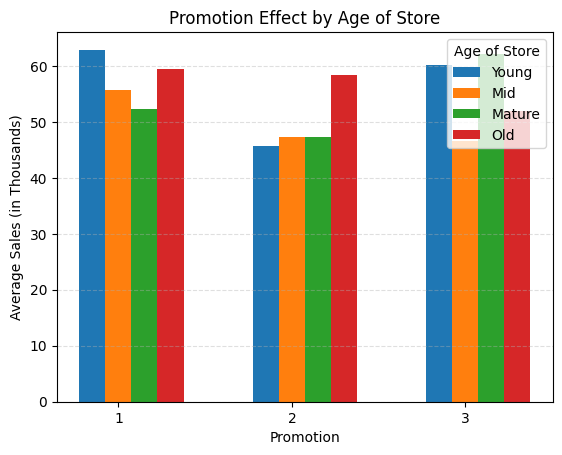

In [130]:
df["AgeGroup"] = pd.cut(df["AgeOfStore"], bins = [0, 5, 10, 20, 30],
                        labels = ["Young", "Mid", "Mature", "Old"])
grouped_age = df.groupby(["Promotion", "AgeGroup"])["SalesInThousands"].mean().unstack()

promotions = grouped.index.astype(str)
age_group = grouped_age.columns
x = np.arange(len(promotions))
bar_width = 0.15

for i, m in enumerate(age_group):
    plt.bar(x + i*bar_width, grouped_age[m], width=bar_width, label=m)

plt.xticks(x + bar_width, promotions)
plt.xlabel("Promotion")
plt.ylabel("Average Sales (in Thousands)")
plt.title("Promotion Effect by Age of Store")
plt.legend(title="Age of Store")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


## Conclusions & Business Insights

- Overall Promotion Effectiveness
    - `Promotion 1` consistently delivers the strongest sales performance and should be considered the default campaign.
    - `Promotion 3` performs similarly to Promotion 1, with no statistically significant difference, and can be used as an alternative depending on cost or operational feasibility.
    - `Promotion 2` significantly underperforms on average and should generally be avoided.

- Heterogeneity Across Markets
    - Market size strongly moderates campaign outcomes: large markets generate substantially higher sales than medium and small markets.
    - `Resource allocation should therefore prioritize large markets, where the ROI of promotions is greatest.`

- Heterogeneity by Store Age
    - Store age has no clear overall effect, but the analysis shows that older stores respond better to `Promotion 2`.
    - This suggests opportunities for a differentiated strategy: `Promotion 1 (or 3)` for most stores, while selectively applying Promotion 2 in mature stores.

- Managerial Recommendation
    - Adopt Promotion 1 as the main strategy, while exploring Promotion 3 where cost-efficiency matters.
    - Implement segmented targeting: direct Promotion 2 specifically to older stores rather than across all stores.
    - Prioritize campaign spending in large markets to maximize impact.